# Домашнее задание №4

Задание выполнил(а): Анна Закутняя

### Общая информация

__Дата выдачи:__ 11.10.2020

__Дедлайн:__ 28.10.2020 23:59

### О задании

Часть 1 содержит теоретические задачи на решающие деревья.

Часть 2 содержит практическое задание на реализацию разбиения вершины в решающем дереве.

Часть 3 содержит практическое задание на применение ансамблей в машинном обучении.

Обратите внимание, что вам не только нужно написать код, но и в некоторых местах ответить на вопросы.

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / 12,
$$

где points — количество баллов, которое вы набрали. Всего в данном домашнем задании можно набрать 15 баллов. Итого, максимальная оценка за данное домашнее задание - $15 \times 10 / 12 = 12.5$.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Для доступа к курсу вам нужно зарегистрироваться в системе, войти в свой профиль, найти раздел «Активация инвайтов на курсы» и ввести инвайт.

Инвайт: lInNu4j

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

# Часть 1 (4 балла)

## 1 (1 балл)

В листе дерева оказываются 10 объектов, 8 из которых из одного класса, а 2 - из второго. Посчитайте (двоичную - с логарифмом по основанию 2) энтропию получившейся выборки в листе. Ответ округлите до двух знаков после запятой.

In [1]:
import numpy as np
np.round(-(8/10) * np.log2(8/10) - (2/10) * np.log2(2/10), 2)

0.72

**Ответ:** 0.72

## 2 (1 балл)

Для приведенной ниже таблицы посчитайте, сколько нужно перебрать предикатов вида $[x_j = a]$ ([признак = какое-то значение]), чтобы построить первый узел решающего дерева.

| $x_1$ | $x_2$ | $x_3$ | $y$ |
|------|------|------|------|
| A1 | A2 | A3 | A|
| B1 | A2 | A3 | A|
| C1 | B2 | A3 | B|
| A1 | C2 | B3 | A|
| B1 | D2 | A3 | B|
| B1 | C2 | B3 | B|
| C1 | D2 | B3 | A|

**Ответ:** 9

## 3 (1 балл)

Используя приведенную таблицу, по какому признаку следует формировать первый узел решающего дерева, если мы хотим предсказать $y$? В качестве критерия информативности использовать энтропию, в качестве критериев разделения - индикаторы $[x_j = a]$.

| $x_1$ | $x_2$ | $x_3$ | $x_4$ | $y$ |
|------|------|------|------|------|
| A1 | A2 | A3 | A4 | A |
| B1 | A2 | B3 | A4 | A |
| C1 | C2 | A3 | A4 | A |
| A1 | A2 | D3 | B4 | A |
| C1 | B2 | C3 | A4 | B |
| B1 | C2 | D3 | B4 | A |
| A1 | B2 | B3 | A4 | A |
| C1 | C2 | C3 | B4 | B |
| B1 | B2 | C3 | B4 | B |
| A1 | C2 | C3 | A4 | B |

__Подсказка.__ *Внимательно посмотрите на данные.*

**Ответ:** 3

## 4 (1 балл)

Из перечисленных наборов объектов разных классов выберите набор с **наименьшей** двоичной энтропией.

    1) 30 объектов класса 0, 10 объектов класса 1
    2) 20 объектов класса 0, 10 объектов класса 1, 10 объектов класса 2
    3) 35 объектов класса 0, 5 объектов класса 1, 5 объектов класса 2
    4) 20 объектов класса 0, 20 объектов класса 1

In [5]:
print(np.round(-(30/40) * np.log2(30/40) - (10/40) * np.log2(10/40), 2))
print(np.round(-(20/40) * np.log2(20/40) - (10/40) * np.log2(10/40)- (10/40) * np.log2(10/40), 2))
print(np.round(-(35/40) * np.log2(35/40) - (5/40) * np.log2(5/40)- (5/40) * np.log2(5/40), 2))
print(np.round(-(20/40) * np.log2(20/40) - (20/40) * np.log2(20/40), 2))

0.81
1.5
0.92
1.0


**Ответ:** 1

# Часть 2 (5.5 баллов)

В этой части вам предстоит реализовать первое разбиение в решающем дереве своими руками.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

%matplotlib inline

In [7]:
plt.rcParams['figure.figsize'] = (11, 6.5)

Импортируем данные.

In [8]:
boston = load_boston()

Описание данных:

In [9]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Данные представлены в виде словаря, у которого есть следующие ключи:

In [10]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Представим данные в виде `pandas.DataFrame`, также добавим в них целевую переменную.

In [11]:
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
X['target'] = boston['target']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Распределение целевой переменной:

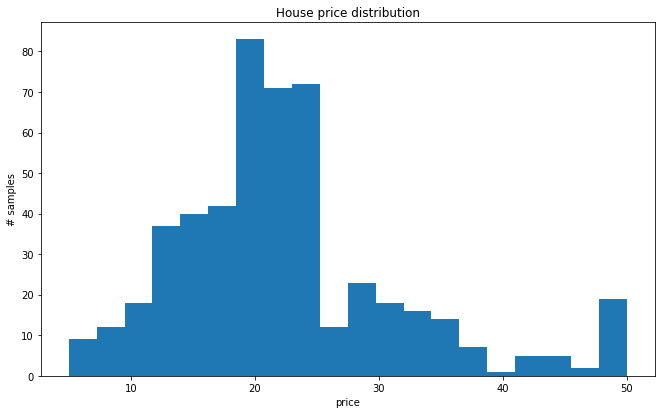

In [12]:
plt.title('House price distribution')
plt.xlabel('price')
plt.ylabel('# samples')
plt.hist(X['target'], bins=20)
plt.show()

Напомним, как ищется разбиение в конкретной вершине. Пусть мы выбрали какой-то признак и порог. Обозначим $R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения.

Критерий ошибки выглядит следующим образом:

$$
Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t},
$$

где $R_\ell$ - множество объектов в левой вершине (поддереве), $R_r$ - множество объектов в правой вершине (поддереве), $|R|$ - число объектов в множестве $R$, а $H(R)$ - критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$. Например, в случае классификации $H(R)$ может быть выражено энтропией, а в случае регрессии - дисперсией.

Мы хотим минимизировать $Q(R_m, j, t)$ по $j$ и $t$ - то есть подобрать такие $j$ и $t$, что для них значение $Q(R_m, j, t)$ будет минимальным.

## 1 (0.5 балла)

Реализуйте функцию подсчета критерия информативности. В данном случае мы решаем задачу регрессии, так что используйте дисперсию значений целевой переменной (колонка 'target').

Сделайте так, чтобы даже для пустой таблицы (в которой нет ни одного объекта) выдавался численный ответ - 0, а не NaN. Возможно, в этом вам поможет функция `np.nan_to_num`.

In [14]:
import statistics as st
def H(R):
    """
    INPUT
    R - pd.DataFrame - характеризует собой набор объектов в вершине. В нашем случае R - это будет подмножество объектов из
    изначальной таблицы X
    
    OUTPUT
    H(R) - значение критерия информативности (дисперсия значений целевой переменной объектов в вершине)
    """
    #D = np.nan_to_num(((R.target - R.target.mean())**2).mean())
    try:
        D = st.variance(R.target)
    except:
        D = 0
    return D

assert np.allclose(H(X), 84.5867235940986)
assert np.allclose(H(pd.DataFrame(columns=X.columns)), 0.0)

## 2 (0.5 балла)

Реализуйте функцию, которая разобьет объекты в данной вершине на две группы по заданному признаку feature и порогу t. Пусть в левую вершину попадут объекты, у которых значение feature <= t, а в правую - у которых значение feature > t.

In [15]:
def split_node(R_m, feature, t):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    feature - string - название столбца (признака)
    t - float - порог признака feature, по которому разбиваем данные
    
    OUTPUT
    R_l - pd.DataFrame - объекты, которые попали в левую вершину
    R_r - pd.DataFrame - объекты, которые попали в правую вершину
    """
    
    
    R_l = R_m[R_m[feature] <= t]
    R_r = R_m[R_m[feature] > t]
    return R_l, R_r

R_l, R_r = split_node(X, 'ZN', 6.0)
assert np.allclose(H(R_l), 73.7555971219894)
assert np.allclose(H(R_r), 70.64116541353386)
assert R_l['ZN'].max() <= 6.0
assert R_r['ZN'].min() > 6.0

## 3 (1 балл)

Реализуйте функцию, подсчитывающую значение критерия ошибки. Разделите данные по заданным признаку и порогу, посчитайте значения критериев информативности в полученных вершинах и получите результат по формуле в начале задания.

In [16]:
def q_error(R_m, feature, t):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    feature - string - название столбца (признака)
    t - float - порог признака feature, по которому разбиваем данные
    
    OUTPUT
    Q - float - значение критерия ошибки
    """
    R_l, R_r = split_node(R_m, feature, t)
    
    
    Q = len(R_l) / len(R_m) * H(R_l) + len(R_r) / len(R_m) * H(R_r)
    return Q

assert np.allclose(q_error(X, 'ZN', 6.0), 72.93082666955256)

## 4 (1.5 балла)

Теперь, когда основные функции реализованы, можно перейти к непосредственному поиску оптимальных признака и порога. Для начала реализуйте функцию, с помощью которой можно найти оптимальный порог для разбиения вершины с помощью заданного признака. В качестве пороговых значений можно перебрать все уникальные значения признака, посчитать для каждого значение критерия ошибки, а затем выбрать пороговое значение, соответствующее наименьшему значению критерия ошибки.

In [17]:
def get_optimal_t(R_m, feature):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    feature - string - название столбца (признака)
    
    OUTPUT
    t_opt - float - оптимальное значение порога (для которого значение критерия ошибки минимально)
    t_array - list - список перебираемых пороговых значений
    Q_array - list - список значений критерия ошибки, соответствующих перебранным пороговым значениям (для построения графика)
    """
    t_array = sorted(R_m[feature].unique())
    Q_array = []
    for t in t_array:
        Q_array.append(q_error(R_m, feature, t))
    
    t_opt = t_array[np.argmin(Q_array)]
    return t_opt, t_array, Q_array

t_opt, t_array, Q_array = get_optimal_t(X, 'CRIM')
assert np.allclose(t_opt, 6.65492)

Выведите график зависимости значения критерия ошибки от порогового значения при разбиении вершины по признаку 'CRIM'.

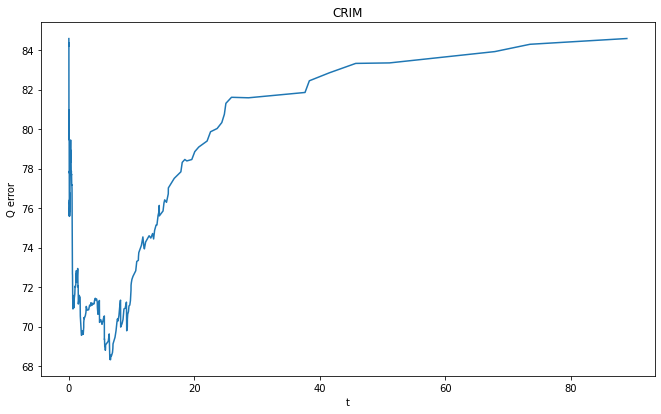

In [18]:
plt.plot(t_array, Q_array)
plt.ylabel('Q error')
plt.xlabel('t')
plt.title('CRIM')
plt.show()

## 5 (1.5 балла)

Теперь реализуйте функцию, с помощью которой можно определить также оптимальный признак. Внутри функции пройдитесь циклом по всем признакам, для каждого вызовите `get_optimal_t`, найдите оптимальный порог и минимальное значение критерия ошибки. Сравните полученные результаты (признаки, пороги и значения критерия ошибки для них) и выберите признак с порогом, соответствующие наименьшему значению критерия ошибки.

**ИСКЛЮЧИТЕ ИЗ РАССМОТРЕНИЯ КОЛОНКУ 'target', ЭТО НЕ ПРИЗНАК!**

In [19]:
def get_optimal_split(R_m):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    
    OUTPUT
    feature_opt - оптимальное значение признака для разбиения вершины
    t_opt - оптимальное значение порога для разбиения вершины
    """
    features = R_m.columns.drop('target')
    t_opt_for_feature = []
    q_for_t_feature = []
    for feature in features:
        t_opt, t_array, Q_array = get_optimal_t(R_m, feature)
        t_opt_for_feature.append(t_opt)
        q_for_t_feature.append(min(Q_array))
    
    feature_opt = features[np.argmin(q_for_t_feature)]
    t_opt = t_opt_for_feature[np.argmin(q_for_t_feature)]
    return feature_opt, t_opt

feature_opt, t_opt = get_optimal_split(X)
print('Optimal feature:', feature_opt)
print('Optimal t:', t_opt)
assert feature_opt == 'RM'
assert np.allclose(t_opt, 6.939)

Optimal feature: RM
Optimal t: 6.939


## 6 (0.5 балла)

Изобразите на графике диаграмму рассеяния для объектов выборки со значением оптимального признака на одной оси и целевой переменной на другой. Нарисуйте линию, показывающую оптимальное разбиение по порогу (функция `plt.axvline`).

Как вы можете интерпретировать то, что полученное разбиение - лучшее?

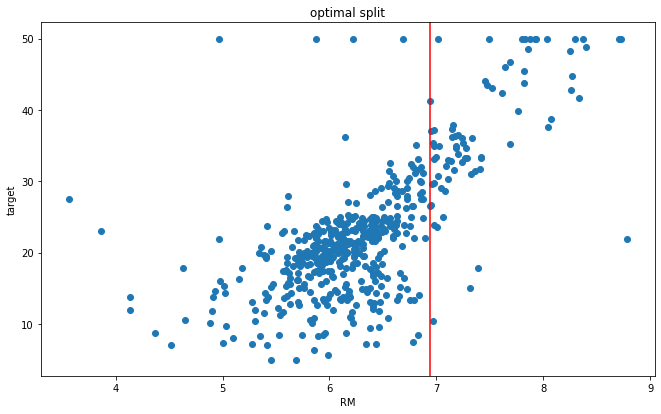

In [20]:
plt.scatter(X['RM'], X['target'])
plt.title('optimal split')
plt.xlabel('RM')
plt.ylabel('target')
plt.axvline(x=t_opt, color='red')
plt.show()

In [25]:
l_av = np.mean(X.target[X['RM'] <= t_opt])
r_av = np.mean(X.target[X['RM'] > t_opt])
print(l_av, r_av)

19.93372093023257 37.23815789473684


Данное разбиение лучшее, поскольку после перебора всех возможных признаков и всех возможных порогов оказалось, что при разбиении объектов по признаку RM - количество комнат в доме - и порогу 6.939 достигается минимум в суммарной дисперсии в обоих вершинах. Это, в свою очередь, означает, что значения целевой переменной (цена на дом) в левой вершине максимально похожи друг на друга и в среднем равны 19 934 долларам, и значения целевой переменной в правой вершине также максимально похожи друг на друга и в среднем равны 37 238 долларам. 


# Часть 3 (5.5 баллов)

В данной части будем работать [с задачей предсказания диабета у пациента](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data).

In [26]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [27]:
data = pd.read_csv('diabetes.csv')

In [28]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
data.shape

(768, 9)

Распределение целевой переменной:

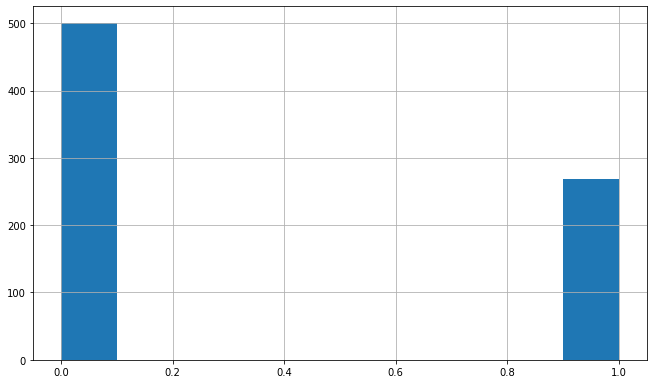

In [30]:
data['Outcome'].hist()
plt.show()

## 1 (0.5 балла)

Разбейте выборку на обучающую и тестовую части в отношении 70:30. Не забудьте отделить целевую переменную от признаков (чтобы случайно не включить ее в обучение как признак).

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome',axis=1), data['Outcome'], test_size=0.3, random_state=13)

## 2 (1 балл)

Обучите [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) на деревьях (параметр `base_estimator=DecisionTreeClassifier()`). Оцените качество классификации на тестовой выборке по метрикам accuracy, precision и recall.

In [36]:
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=13)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

Accuracy: 0.7359307359307359
Precision: 0.703125
Recall: 0.5172413793103449


## 3 (1 балл)

Теперь обучите Random Forest с числом деревьев, равным 50. Оцените качество классификации по тем же метрикам. Какая из двух построенных моделей показала себя лучше?

In [37]:
rfc = RandomForestClassifier(n_estimators=50, random_state=13)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

Accuracy: 0.7575757575757576
Precision: 0.7183098591549296
Recall: 0.5862068965517241


Лучше себя показал случайный лес, поскольку по сравнению с беггингом удалось получить более высокие значения по всем трем метрикам.

## 4 (1 балл)

Для случайного леса проанализируйте значение AUC-ROC на этих же данных в зависимости от изменения параметров (можете сделать обычный перебор с обучением/тестированием в цикле):
* `'n_estimators'` (можно перебрать около 10 значений из отрезка от 10 до 1500)
* `'min_samples_leaf'` (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости AUC-ROC от этих параметров. Какие выводы вы можете сделать?

In [38]:
n_estimators = range(10,1500,150)
n_estimators_score = []
for n in n_estimators:
    rfc = RandomForestClassifier(n_estimators=n, random_state=13)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    n_estimators_score.append(roc_auc_score(y_test, y_pred))

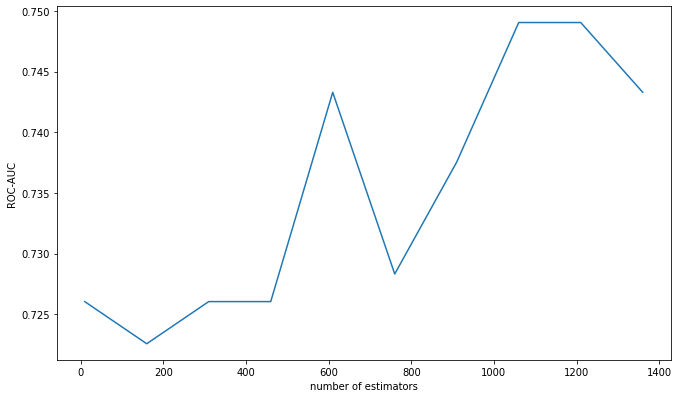

In [39]:
plt.plot(n_estimators, n_estimators_score)
plt.xlabel('number of estimators')
plt.ylabel('ROC-AUC')
plt.show()

In [42]:
min_samples_leaf = range(1,50,2)
min_samples_leaf_score = []
for leaf in min_samples_leaf:
    rfc = RandomForestClassifier(min_samples_leaf=leaf, random_state=13)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    min_samples_leaf_score.append(roc_auc_score(y_test, y_pred))

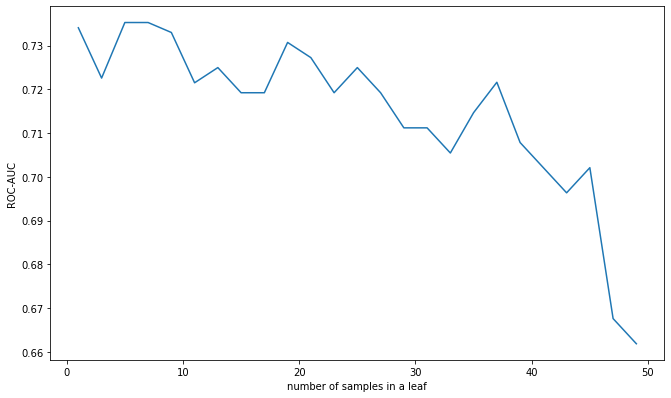

In [43]:
plt.plot(min_samples_leaf, min_samples_leaf_score)
plt.xlabel('number of samples in a leaf')
plt.ylabel('ROC-AUC')
plt.show()

Выводы: С ростом количества деревьев в модели растет метрика ROC-AUC. Это объясняется тем, что при увеличении количества нескоррелированных деревьев в случайном лесу уменьшается разброс.
Если смотреть на количество объектов в листе, то можно заметить, что наилучшее качество достигается при минимальных значениях данного параметра. Для достижения минимального смещения композиции необходимо, чтобы базовые алгоритмы были сложные, то есть имели как можно меньшее количество объектов в листе.
Таким образом, композиция дает наилучший результат при достаточно большом количестве дерьевьев, а также при минимальном количестве объектов в листе.

Найдем оптимальные параметры (количество деревьев и количество объектов в листе) по сетке:

In [45]:
from sklearn.model_selection import ParameterGrid
param_grid = {'n_estimators': range(10,1500,150), 'min_samples_leaf': range(1,50,2)}
grid = list(ParameterGrid(param_grid))

grid_score = []
for line in grid:
    leaf = line['min_samples_leaf']
    n = line['n_estimators']
    rfc = RandomForestClassifier(n_estimators=n, min_samples_leaf=leaf,random_state=13)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    grid_score.append(roc_auc_score(y_test, y_pred))

In [48]:
print(f'Оптимальные параметры: {grid[np.argmax(grid_score)]}')
print(f'ROC-AUC при оптимальных параметрах: {max(grid_score)}')

Оптимальные параметры: {'min_samples_leaf': 1, 'n_estimators': 1060}
ROC-AUC при оптимальных параметрах: 0.7490421455938697


## 5 (1 балл)

Для лучшей модели случайного леса посчитайте важность признаков и постройте bar plot с помощью функции [`plt.bar`](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.bar.html). Какой признак оказался самым важным для определения диабета?

In [50]:
n = grid[np.argmax(grid_score)]['n_estimators']
leaf = grid[np.argmax(grid_score)]['min_samples_leaf']

In [52]:
rfc = RandomForestClassifier(n_estimators=n, min_samples_leaf=leaf,random_state=13)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1060, random_state=13)

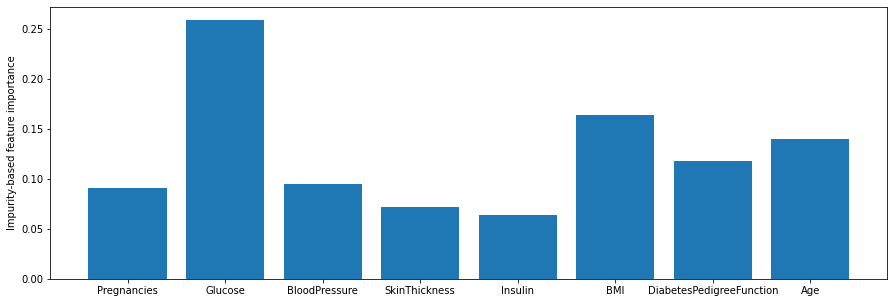

In [53]:
plt.subplots(figsize=(15, 5))
plt.bar(data.drop('Outcome',axis=1).columns ,rfc.feature_importances_)
plt.ylabel('Impurity-based feature importance')
plt.show()

Самым важным признаком оказался признак Glucose: уровень сахара в крови.

## 6 (1 балл)

По аналогии со случайным лесом, переберите различные значения числа деревьев для [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) и постройте график зависимости AUC-ROC от числа деревьев. Что вы наблюдаете? Отличается ли этот график от аналогичного графика для случайного леса?

In [54]:
n_estimators = range(10,2000,150)
n_estimators_score = []
for n in n_estimators:
    gbc = GradientBoostingClassifier(n_estimators=n, random_state=13)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    n_estimators_score.append(roc_auc_score(y_test, y_pred))

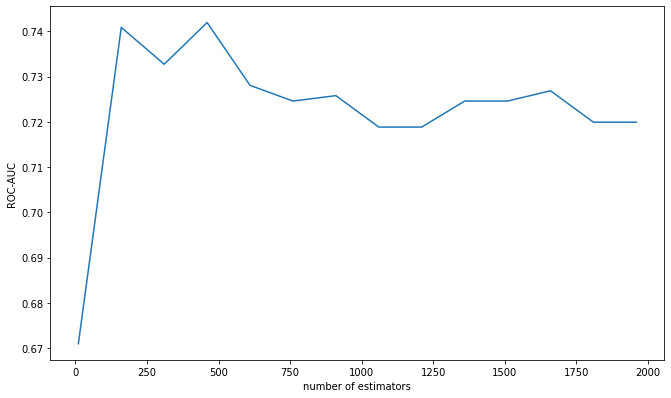

In [55]:
plt.plot(n_estimators, n_estimators_score)
plt.xlabel('number of estimators')
plt.ylabel('ROC-AUC')
plt.show()

В отличие от случайного леса, в градиентном бустинге при росте числа деревьев качество композиции падает. Это происходит из-за способности модели переобучаться с ростом количества базовых алгоритмов, поскольку каждый последующий базовый алгоритм все больше подстраивается под имеющуюся обучающую выборку. 